<a href="https://colab.research.google.com/github/adsferreira/convnet.mnist/blob/main/cnn.mnist.classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à Classificação de Imagens com Deep Learning usando Python, Keras e Google Colab**

Neste minicurso, aprenderemos os conceitos introdutórios de modelagem de uma rede neural convolucional para o problema básico de classificação de imagens de caracters numéricos escritos à mão, disponível na base de dados MNIST. Para isso, utilizaremos o framework de *deep learning* `keras`, que disponibiliza uma interface para a linguagem de programação `Python`, e a plataforma de computação em nuvem `Google` `Colab`, que provê esta interface web onde codificaremos e executaremos o treinamento da rede utilizando unidades de processamento gráfico (GPUs), para acelerar o treinamento da rede neural convolucional. Ao final, avaliaremos o desempenho dos modelos de rede neural projetados nas amostras de testes.

O minicurso está dividido nas seguintes seções:



1.   Imagens da base de dados MNIST
2.   Aspesctos básicos de uma Rede Neural Convolucional
3.   Passo-a-passo para implementar uma convnet no `keras`




# Imagens da base de dados MNIST

A base de dados MNIST (*Modified National Institute of Standards and Technology*) provê um grande conjunto de imagens digitalizadas de caracteres numéricos escritos à mão. A base, que é amplamente empregada para treinamento e teste de soluções em aprendizado de máquina, possui um conjunto de treinamento com 60.000 (sessenta mil) imagens e um conjunto de testes com 10.000 (dez mil) imagens.

Os caracteres foram centralizados em imagens de tamanho fixo e seus tamanhos foram normalizados, facilitando, assim, o trabalho de modelamento de diferentes classificadores (informações adicionais sobre a base MNIST podem ser acessadas em http://yann.lecun.com/exdb/mnist/).   

O `keras` provê uma maneira de carregar as imagens e seus respectivos rótulos automaticamente. Os rótulos (ou *labels*, em inglês) são os dados que indicam qual é o caracter presente numa determinada imagem. No MNIST, há apenas um caracter por imagem, e os possíveis valores que podem aparecer nas imagens são os decimais de 0 à 9. Assim, os possíveis rótulos são os números 0, 1, 2, 3, 4, 5, 6, 7, 8 e 9. 

Vamos, então, importar o pacote `keras.datasets` para carregar a base `mnist` e conhecer mais detalhes sobre este conjunto de dados. Isto pode ser feito conforme o código em Python abaixo:

In [19]:
from keras.datasets import mnist

Podemos notar, acima, que importamos a classe `mnist` disponível dentro do pacote `keras.datasets`. O Python provê esta maneira elegante de importar pacotes, classes, etc., de dentro de outros pacotes, através da utilização da palavra reservada `from` seguida do nome do pacote que deseja utilizar, e da palavra reservada `import` procedida pela lista de classes ou pacotes que queira importar.





Depois de importar a classe `mnist`, basta chamar seu método `load_data()` para carregar todas imagens e rótulos da base de dados automaticamente. O método já retorna as imagens separadas para treinamento e testes do classificador (que, no nosso caso, será uma `convnet`). 



Notem, no código abaixo, que a chamada do método `load_data()` retorna duas tuplas: a primeira `(train_images, train_labels)` contem a lista de imagens de treinamento (variável `train_images`) e a respectiva lista de rótulos (variável `train_labels`). Da mesma forma, a tupla `(test_images, test_labels)` contem uma lista de imagens e respectivos rótulos somente para testes dos classificadores modelados.

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Agora, podemos conhecer as características das variáveis presentes nas tuplas, assim como dos dados por elas armazenados. Primeiramente, vamos conhecer o tipo das variáveis usando as funções `type` e `print` do Python (`type` retorna o tipo da variável e `print` imprime algo na saída): 

In [ ]:
print("A variável 'train_images' é do tipo ", type(train_images))
print("A variável 'train_labels' é do tipo ", type(train_images))
print("A variável 'test_images' é do tipo ", type(train_images))
print("A variável 'test_labels' é do tipo ", type(train_images))

A variável 'train_images' é do tipo  <class 'numpy.ndarray'>
A variável 'train_labels' é do tipo  <class 'numpy.ndarray'>
A variável 'test_images' é do tipo  <class 'numpy.ndarray'>
A variável 'test_labels' é do tipo  <class 'numpy.ndarray'>


Conforme a saída acima, todas as variáveis retornadas pela método `load_data()` são do tipo `numpy.ndarray`, o que significa que elas são arranjos (*arrays*) de dimensão *n* (*n-dimensional array*, ou `ndarray`) fornecidos pelo pacote `numpy`. O numpy contem uma biblioteca ampla de funcionalidades para computação científica, incluindo uma série de métodos para manipulação de diferentes tipos de arranjos, como vetores, matrizes, etc. (mais informações podem ser acessadas em (https://numpy.org/). 

Como um arranjo de tipo `numpy.ndarray` pode assumir um número arbitrário *n* de dimensões (como um vetor, de uma dimensão, ou uma matriz, de duas dimensões), muitas vezes é necessário saber, no programa, quais são exatamente suas dimensões. Isto é facilmente realizado com qualquer arranjo do `numpy` utilizando-se o método `shape`. Abaixo, imprimimos as dimensões de todos vetores criados acima:

In [21]:
print("A variável 'train_images' possui as seguintes dimensões", train_images.shape)
print("A variável 'train_labels' possui as seguintes dimensões", train_labels.shape)
print("A variável 'test_images' possui as seguintes dimensões", test_images.shape)
print("A variável 'test_labels' possui as seguintes dimensões", test_labels.shape)

A variável 'train_images' possui as seguintes dimensões (60000, 28, 28)
A variável 'train_labels' possui as seguintes dimensões (60000,)
A variável 'test_images' possui as seguintes dimensões (10000, 28, 28)
A variável 'test_labels' possui as seguintes dimensões (10000,)


Podemos notar que o conjunto de dados de treinamento possui 60.000 imagens de 28x28 pixels, e que o conjunto de testes possui 10.000. Correspondentemente, os vetores de rótulos possuem 60.000 e 10.000 elementos (um rótulo para cada imagem).  

Vamos gerar, como exemplo, a segunda imagem do arranjo `train_images` e, em seguida, seu rótulo, para validarmos se são correspondentes. Para gerar a imagem, podemos utilizar o pacote `pyplot` da biblioteca `matplotlib`. Vale lembrar que no Python o primeiro elemento está na posição de índice zero, o segundo na de índice um, e assim consecutivamente (o último elemento está na posição `número total de elementos-1`).

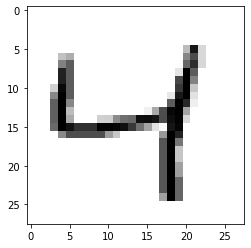

In [22]:
from matplotlib import pyplot

image_id = 2  # índice da imagem
image = train_images[image_id]
pyplot.imshow(image, cmap=pyplot.cm.binary)
pyplot.show()

In [23]:
label = train_labels[image_id]
print("O rótulo da imagem acima é ", label)

O rótulo da imagem acima é  4


Conforme a saída acima, a imagem corresponde ao caracter "4" (quatro). Para testar outras imagens, basta mudar o valor da variável `image_id`. Os possíveis valores variam de 0 (índice da 1ª imagem) a 59999 (índice da última imagem). Também é possível validar as imagens do conjunto de testes. Neste caso, é necessário utilizar as variáveis `test_images` e `test_labels`, assim como assumir que os últimos elementos destes arranjos estão na posição de índice 9999. 

Notem que as cores da imagem acima estão definidas em **escala de cinza**. Isto significa que cada pixel da imagem possui apenas um valor (ou um canal), que representa a intensidade de cor cinza que esse pixel deve ser preenchido. Esta intensidade ou escala de cinza é um valor inteiro que pode variar de 0 a 255 (0 representa a cor branca - menor intensidade - e 255 a cor preta - maior intensidade).

Vamos verificar o conteúdo da matriz que representa a imagem que foi gerada acima? O trecho de código abaixo imprimi a matriz que forma a imagem acima. Notem a semelhança entre o caracter da imagem digital com a matriz de intensidades de cinza, abaixo.

In [24]:
# formatando a saída para imprimir matriz em formato retangular 
for row in train_images[image_id]:
  fmt_row = ""
  
  # loop para construir cada linha da imagem de maneira formatada
  for elem in row:
    if elem < 10:  # elemento com um algarismo
      fmt_row += str(elem) + "   "
    elif elem >= 10 and elem < 100:  # elemento com dois algarismos
      fmt_row += str(elem) + "  "
    else:
      fmt_row += str(elem) + " "  # elemento com três algarismos
    
  print("\n", fmt_row)
  
  fmt_row = ""


 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   67  232 39  0   0   0   0   0   

 0   0   0   0   62  81  0   0   0   0   0   0   0   0   0   0   0   0   0   0   120 180 39  0   0   0   0   0   

 0   0   0   0   126 163 0   0   0   0   0   0   0   0   0   0   0   0   0   2   153 210 40  0   0   0   0   0   

 0   0   0   0   220 163 0   0   0   0   0   0   0   0   0   0   0   0   0   27

É possível notar, acima, que os valores dos elementos (pixels) das regiões de cor branca assumem o menor valor de intensidade de cinza (0, ou branco). Já os pixels das regiões que formam o caracter zero recebem intensidades mais fortes de cinza, sendo que alguns valores estão quase na intensidade máxima (255, cor preta).

# Aspectos básicos de uma rede neural convolucional

A nossa tarefa, aqui, é criar um programa que receba uma imagem da base MNIST e mostre, como saída, qual é o caracter presente na imagem processada. Assim, podemos representar o programa que desenvolveremos aqui com a figura abaixo, onde a `convnet`, em forma de "caixa preta", recebe e processa a imagem com o caracter "oito" escrito e deve responder rotulando a imagem adequadamente.   

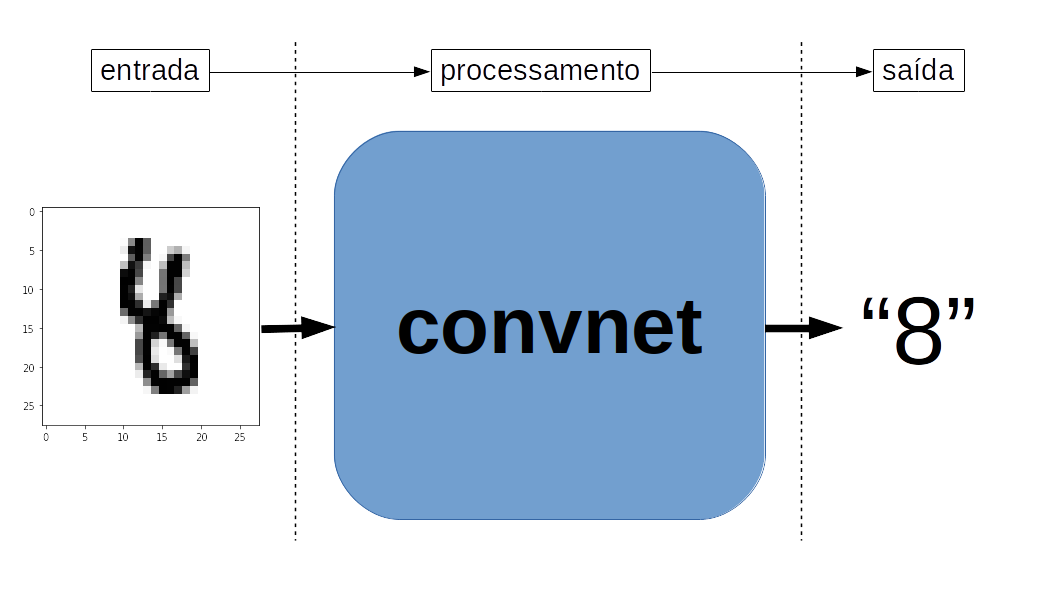

Para "implementar" o programa acima, não criaremos uma `convnet` "lotadas" de `if/else` (risos), mas sim a modelaremos por meio de um **processo de treinamento**, onde utilizamos nosso conjunto de treinamento para buscar bons modelos (lembram da tupla `(train_images, train_labels)`, com as imagens e respectivos rótulos para treinamento?). Se conseguirmos treinar modelos de `convnet` que processem satisfatoriamente imagens de testes, teremos um bom indicativo que modelamos a `convnet` adequadamente.

E como realizamos o treinamento da `convnet`? Para responder esta pergunta, vamos conhecer um pouco mais sobre a **arquitetura** desta rede neural artificial. 

Se abrimos a "caixa preta" `convnet` acima, poderíamos notar que sua **arquitetura** é **formada por uma pilha de camadas**, que se inicia com a **camada de entrada** (formada, literalmente, pela entrada da rede, ou seja, uma imagem no nosso problema), um ou mais **camadas escondidas**, e a **camada de saída** (aquela que gera a resposta final da rede).

Além disso, também notaríamos que as primeiras camadas escondidas são camadas **convolucionais** concatenadas com camadas **Pooling** (subamostragem), e as camadas finais são camadas **densas**.

Um exemplo de um arquitetura de uma convnet é dada abaixo (fonte: Aphex34 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=45679374):

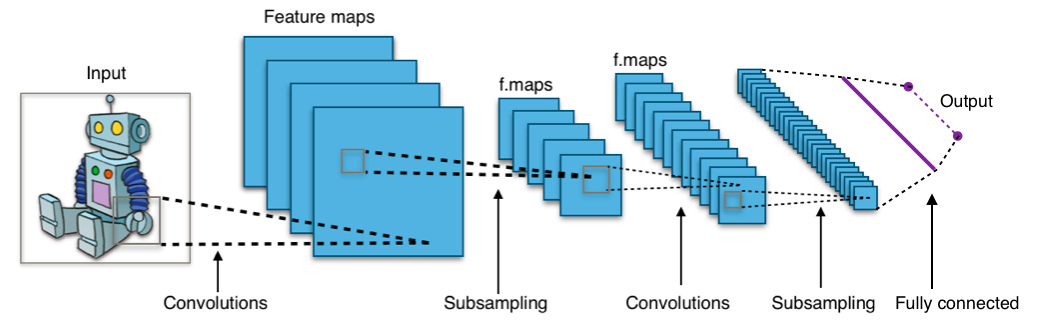

Notem, acima, que a camada de entrada (*input*) é uma imagem (um exemplo de robô, neste caso). Quando esta imagem "entra" numa `convnet`, primeiramente esta imagem será processada pelas camadas convolucionais, uma por vez. Isto significa que a imagem é **transformada** quando a primeira camada convolucional opera sobre a imagem; a saída desta primeira camada convolucional, que também é um arranjo, torna-se a entrada da próxima camada *Pooling*, que, por sua vez, também transforma o arranjo de entrada, gerando uma saída para a terceira camada convolucional, e assim por diante, até atingir as camadas densas, que são as camadas que de fato classificam a imagem de entrada. Vale mencionar que os arranjos que entram e saem das camadas de uma `convnet` são tipicamente chamados de **tensores**.

Basicamente, as camadas convolucionais aplicam **operações de convolução** sobre o tensor de entrada. A operação de convolução consiste em posicionar uma janela (uma matriz, também conhecida como filtro ou *kernel*), que cubra uma região da imagem, onde o pixel central da janela se alinha ao pixel (de referência) da imagem original, e os todos os pixels alinhados (sobrepostos) da imagem e da janela tem seus valores multiplicados, e os resultados da multiplicação são somados e armazenados no pixel da imagem de saída que está na mesma posição pixel de referência da imagem original. A operação de convolução só termina quando a janela passa por todos (ou quase todos) os pixels da imagem, sendo que operação tipicamente se inicia no pixel no topo-esquerda, e termina na base-direita. A figura abaixo ilustra como é feita a operação de convolução num único pixel da imagem (fonte: https://datascience.stackexchange.com/questions/23183/why-convolutions-always-use-odd-numbers-as-filter-size/23186): 


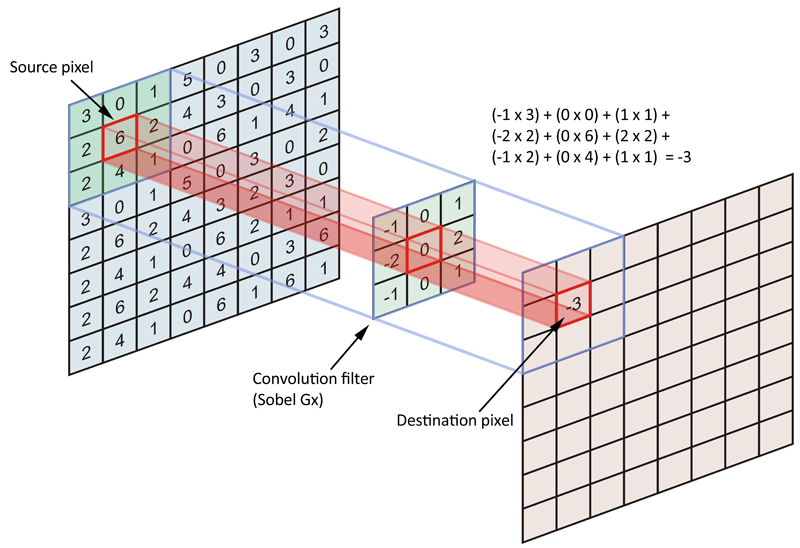

No caso da `convnet`, esses filtros "aprendem" a extrair características das imagens. Estas características aprendidas começam, tipicamente, com as partes mais simples das imagens, como cantos, linhas, e conforme **a rede vai ficando mais profunda** (em termos de camadas), características "de alta ordem" são captadas pelas últimas camadas convolucionais, como, por exemplo, a pata de um cachorro, a orelha de um gato, etc.

Por fim, o resultado das operações de convolução numa convnet passa por uma função de ativação não-linear. São as funções de ativação que permitem "projeções não-lineares" nos espaços de característica e auxiliam na separação ou identificação dos padrões em um espaço não-linear. Nos nossos exemplos, assim como em muito problemas, utilizaremos a função de ativação `relu`, que é exemplificada abaixo (fonte: https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7). Notem que uma relu apenas trunca em zero valores negativos.

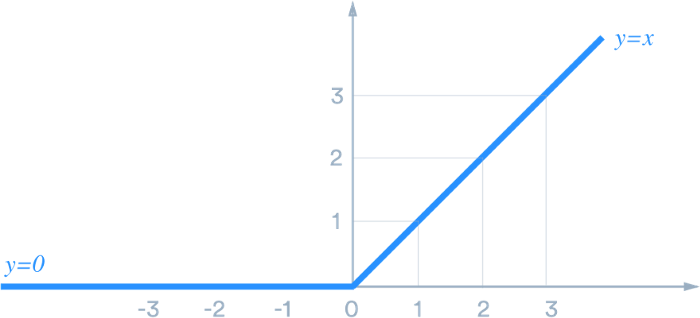

Já as camadas de *Pooling* reduzem o tamanho das imagens geradas para convolução utilizando-se, também, de janelas que se posicionam sobre os tensores (similarmente ao *kernel*), e dentre dos pixels sobrepostos pela janela, pode se tirar a média os valores dos pixels ou escolher aquele que possui valor com maior intensidade. Utilizaremos este último neste tutorial, também conhecido como *MaxPooling*.

Um exemplo de *MaxPooling* é dado abaixo. Notem que uma janela de 2x2 pixels do *MaxPooling* se posiciona em quatro regiões de uma imagem 4x4 pixles (com cores diferentes). Isto ocorre pois a janela não se sobrepõem em pixels que já foram considerados neste caso (o que significa que a janela teve um passo de 2 pixels tanto no eixo *x* quanto no *y*). Para cada janela *MaxPooling*, o valor máximo foi escolhido (fonte: Stanford’s CS231n).

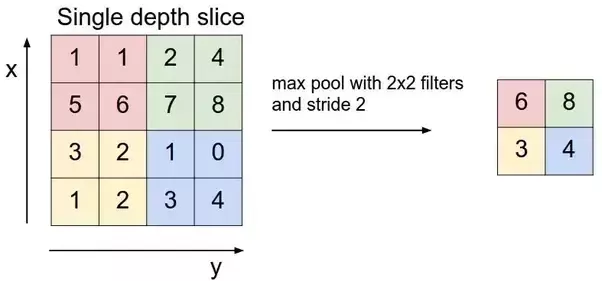

Por fim, vale mencionar que o aprendizado numa `convnet` ocorre somente nas camadas convolucionais e densas, pois estas possuem parâmetros livres que são ajustados durante o processo de treinamento. Embora camadas do tipo *MaxPooling* e outras tenham uma funções importantes na rede, estas não possuem parâmetros livres ajustáveis.

Para se iniciar o processamento nas camadas densas, a saída da última camada da parte convolucional deve ser linearizada, isto é, o arranjo de saída deve se tornar um vetor antes de ser processado pela(s) camada(s) densa(s). A ilustração abaixo exemplifica este processo (fonte: https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening):

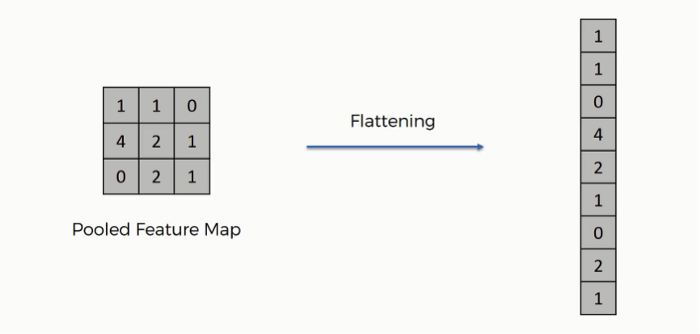

Basicamente, a linearização ou achatamento do arranjo (ou do inglês *Flattening*) consiste no "desempilhamento" do arranjo, sem modificar seu conteúdo.

Cada neurônio da primeira camada densa processa o vetor linearizado e envia sua resposta para todos neurônios da próxima camada, de forma que todas as camadas densas sejam totalmente conectadas (todos os neurônios de uma camada enviam suas respostas para todos neurônios da camada subsequente). Segue abaixo uma ilustração das camadas densas:

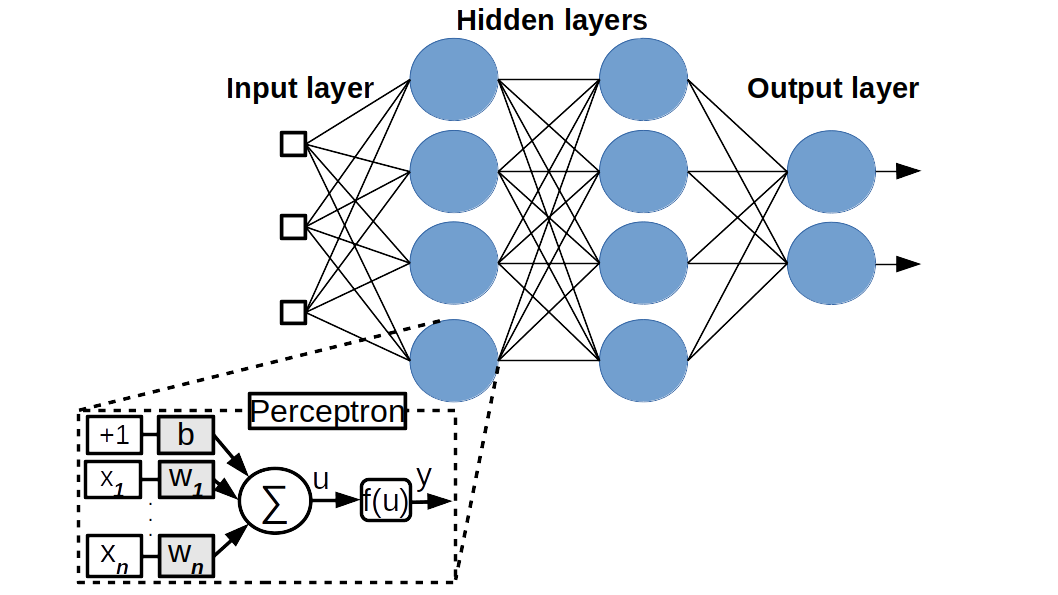

Nas camadas densas, cada nó ou neurônio é conhecido como **Perceptron**, que possui um conjunto de pesos **w** que são linearmente combinados com o vetor de entrada. O resultado da combinação linear passa por uma função de ativação que irá gerar a saída do respectivo neurônio (no nosso problema, também utilizaremos uma `relu` como função de ativação para os neurônios das camadas densas escondidas).

Um último aspecto importante é que a camada densa de saída, que finalmente determinará a classe da imagem que foi processada, não conterá funções de ativação do tipo `relu`, mas sim do tipo `softmax`. Por quê?

No caso de classificadores (como o que estamos desenvolvendo aqui), **a camada de saída tipicamente possuí um número de neurônios de saída igual ao número de classes presentes no problema em questão**. Assim, como nossas imagens podem representar 10 classes possíveis (inteiros de 0 a 9), colocamos 10 neurônios na última camada.

Os neurônios da saída gererão, como saída, as probabilidades da imagem processada ser de alguma das possíveis classes (por isso a função `softmax`). Em outras palavras, gostaríamos que o 1º neurônio da camada de saída gerasse uma probabilidade alta caso a imagem processada contesse o carater "1", que o 2º neurônio produzisse uma probabilidade alta caso a imagem for "2", e assim por diante. Portanto, a saída da nossa `convnet` será um vetor com 10 probabilidades (uma de cada neurônio de saída), e a saída que prevalecerá da rede é aquela que contem maior probabilidade.

# Passo-a-passo para implementar uma convnet no `keras`

Primeiramente, vamos importar os objetos do keras que usaremos para construir nossa `convnet`:

In [25]:
from keras import layers
from keras import models
from keras.utils import to_categorical

Notem que importamos o objeto `models` (que permitirá configurar um modelo de convnet), e o objeto `layers`, que nos permitirá definir qual tipo de camada queremos criar no modelo da nossa `convnet`. Importamos também a função to_categorical do pacote keras.utils, pois iremos formatar nossos rótulos (mais detalhes serão dados abaixo).

Agora, vamos criar as camadas convolucionais da rede neural artificial, intercaladas com camadas do tipo *MaxPooling*:


In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Notem que primeiramente criamos uma variável `model`, que será um modelo sequêncial de `convnet`, ou seja, uma pilha de camadas (*layers*). Depois, utilizamos o método `add()` para adicionar as camadas ao modelo. Então, adicionamos 3 camadas do tipo `Conv2D`, intercaladas por duas camadas `MaxPool2D`. Ambos nomes recebem a descrição "2D", pois eles operam sobre imagens 2D.

Vale notar que as camadas de uma *convnet* recebem, como entrada, tensores de dimensão *(altura_imagem, largura_imagem, quantidade_de_canais)*. O keras determina que apenas na primeira camada precisamos definir o formato que será processado. Nas camadas subsequentes, o keras determina automaticamente as dimensões dos tensores.  

Neste caso, configuramos uma *convnet* para processar, como entrada, imagens com 28 pixels de altura, 28 pixels de largura, e apenas um canal (para representar os níveis de cinza) (`input_shape=(28, 28, 1)`). Notem que o formato das imagens presentes na base MNIST já possuem 28x28 pixels, onde cada pixel carrega um nível de cinza. Posteriormente, faremos um pequeno ajuste nas dimensões das imagens MNIST, pois, como vimos acima, seus arranjos são `(28,28)` e não `(28,28,1)`. Isto é facilmente feito pelo `numpy`.

Para configurar uma camada Conv2D, basta definir o número de filtros convolucionais (1º parâmetro inteiro), e depois uma tupla que indica o tamanho do filtro (*kernel*). Podemos ver que a primeira camada terá 32 filtros de 3x3 pixels, e que a segunda e terceiras camadas Conv2D terão 64 filtros de 3x3 pixels). Por fim, precisamos indicar a função de ativação das Conv2D, que nesse caso são funções `relu` `(activation=relu)`.

Já nas camadas `MaxPool2D`, é suficiente definir somente o tamanho de sua janela, que nesse caso foi janelas de 2x2 pixels: tupla `(2,2)`.

Agora, podemos imprimir a arquitetura da *convnet* que configuramos até agora:

In [27]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Podemos notar, pela saída acima, que a saída de cada camada *Conv2D* e *MaxPool2D* é um tensor na forma *(altura, largura, profundidade)*. As alturas e larguras de cada camada tendem a diminuir conforme a rede neural vai ficando mais profunda (adquiri mais camadas). Profundidade é controlada pelo primeiro argumento passado às camadas *Conv2D*: 32 ou 64 nós. 

O próximo passo é incluir um classificador densamente conectado na saída da parte convolucional da rede neural. Isto é feito criando uma pilha de camadas do tipo `Dense`. Este tipo de camada processa vetores, enquanto a saída da última camada convolucional é um tensor 3D de dimensão `(3, 3, 64)`, como mostra o sumário da arquitetura acima. Desta forma, primeiramente linearizamos o tensor 3D, de forma que se torne um vetor 1D. Para isso, incluímos uma camada *flatten* utilizando o método *Flatten()* do objeto *layers*:

In [28]:
model.add(layers.Flatten())

Agora, incluimos algumas camadas do tipo `Dense` no topo da rede neural:

In [29]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Notem que a última camada possui 10 neurônios. Esta configuração é necessária, pois existem 10 diferentes classes na base MNIST (conforme descrito na seção anterior). Desta forma, um determinado neurônio na saída deverá ser *mais ativado* quando a rede processar uma imagem que corresponde a sua respectiva classe. Ou seja, este neurônio específico responderá com uma probabilidade mais alta que a de outros neurônios de saída.

Vamos conferir, novamente, se a *convnet* está projetada assim como determinamos no código acima:

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Como podemos notar, a saída da última camada convolucional, cuja dimensões são (3, 3, 64), foram linearizadas para um vetor de 576 elementos (3 x 3 x 64 = 576?):

In [31]:
print(3 * 3 * 64)

576


Agora que construimos um modelo, vamos de fato ao treinamento. Primeiramente, vamos redimensionar as imagens de entrada, tanto do cojunto de treinamento quanto do de testes, pois este é o formato esperado pelo `keras`. Para isso, basta utilizar o método `reshape` do `numpy`:

In [32]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Agora, todas imagens de entrada tem dimensão `(28,28,1)`. Por exemplo, vamos imprimir as dimensões da imagem utilizada no ínico (segunda imagem do conjunto de treinamento):

In [33]:
print(train_images[image_id].shape)

(28, 28, 1)


Além disso, o `keras` espera números de ponto flutuante como entrada. Mas nossas imagens contem números inteiros (níveis de cinza). Então, podemos checar também o tipo de dado dos elementos da imagem. Para isso, é suficiente checar o tipo de dado do primeiro elemento da matriz *train_images*:

In [34]:
print(type(train_images[0][0][0][0]))

<class 'numpy.uint8'>


Podemos notar que os elementos da imagem são inteiros de 8 bits sem sinal. De fato, esperamos que os elementos sejam do tipo inteiro. Imprimimos a última dimensão da matriz, pois é na dimensão *canais* que aparecem os valores que definem as cores em cada pixel da imagem. No caso das imagens da base MNIST, as cores são cinzas, que são valores escalares inteiros (precisam de apenas um canal) que variam de 0 (preto) a 255 (branco). No caso de imagens coloridas, é típico utilizar-se a representação RGB (Red-Green-Blue), que necessitam de três canais para representação (um para cada cor, vermelha, verde e azul), e cada canal poderá assumir uma intensidade que varia de 0 a 255.


Podemos checar o menor e o maior valor presente em todas imagens da base MNIST. Para isso, utilizaremos as funções *min* e *max* do *numpy*:

In [35]:
print("valor mínimo encontrado nas imagens da base de treinamento: ", train_images.min())
print("valor máximo encontrado nas imagens da base de treinamento: ", train_images.max())
print("valor mínimo encontrado nas imagens da base de teste: ", test_images.max())
print("valor máximo encontrado nas imagens da base de teste: ", test_images.max())

valor mínimo encontrado nas imagens da base de treinamento:  0
valor máximo encontrado nas imagens da base de treinamento:  255
valor mínimo encontrado nas imagens da base de teste:  255
valor máximo encontrado nas imagens da base de teste:  255


Podemos afirmar que ao menos uma imagem possui as cores preto e branco na base MNIST, pois podemos afirmar que a base possui o valor 0 e 255 para alguns pixels das imagens.

Além disso, é interessante normalizarmos os dados de entrada. No caso de Redes Neurais Artificiais, é comum normalizarmos os dados de entrada antes do processamento pela rede. Por exemplo, números grandes, como o 255 para representar uma cor, podem ser inadequados para treinamento. Assim, precisamos deixar os dados mais "comportados". Um tipo de normalização simples é escalar os valores de entrada para o intervalo 0-1, conforme abaixo:

In [36]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Notem, acima, que resolvemos o problema do tipo de dado e sua normalização de uma vez só: os tipos foram convertidos para `float32` e os valores agora estão entre 0 e 1.

Não diferente, precisamos também adaptar os rótulos. Primeiramente, vamos checar as dimensões dos rótulos presentes na base MNIST:

In [37]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


Podemos notar que ambos são vetores (de uma dimensão), e que cada vetor possui uma quantidade de rótulos correspondente com o número de imagens em cada conjunto de dados respectivo. De fato, os rótulos são os números inteiros representados por cada imagem, ou seja, os decimais de 0 a 9. Podemos utilizar as funções *min* e *max* para validarmos os valores mínimo e máximo presentes nos vetores acima: 

In [38]:
print("menor valor encontrado nos rótulos de treinamento", train_labels.min())
print("maior valor encontrado nos rótulos de treinamento", train_labels.max())
print("menor valor encontrado nos rótulos de teste", test_labels.min())
print("maior valor encontrado nos rótulos de teste", test_labels.max())

menor valor encontrado nos rótulos de treinamento 0
maior valor encontrado nos rótulos de treinamento 9
menor valor encontrado nos rótulos de teste 0
maior valor encontrado nos rótulos de teste 9


Há um motivo simples para arquitetar a saída da rede desta maneira: queremos modelar a rede de forma que quando esta receba uma imagem com o caracter zero desenhado, seu primeiro neurônio de saída ative mais que o restante dos neurônios de saída, ou seja, o neurônio que ativou responda com probabilidade perto de 1 e o restante perto de 0, e assim por diante. Assim, vamos mudar a representação dos rótulos: ao invés de utilizar apenas o número presente no rótulo, faremos com que esse número seja representado por um vetor de 10 posições (pois temos 10 classes), e que este vetor contenha todos elementos com valores zero, exceto o elemento que está na posição representada pelo respectivo número. Este elemento recebe o valor 1. Por exemplo, um rótulo com valor 9 será representado por um vetor de zeros em todas posições, exceto na posição 9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1].

De fato, a intenção é modelarmos a rede para que seu último neurônio de saída dê como resposta um valor próximo a 1, e todo o restante responda com valores próximos a zero.

Como este tipo de mudança é bem típico, o `keras` já provê esta funcionalidade através da função `to_categorical`:

In [39]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Vamos verificar como ficou o rótulo da imagem utilizada como exemplo?

In [40]:
print(train_labels[image_id])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Com a arquitetura da rede e base de dados configuradas, resta-nos apenas configurar como se dará o treinamento e executá-lo. Os elementos básicos que configuraremos são o **otimizador** que realizará a modelagem (algoritmo de treinamento em si), o tipo de **função custo** (*loss function*) para medir o desempenho da rede durante o treinamento, e a métrica de monitoramento usada no treinamento e no teste. O otimizador usado será o `rmsprop`, a **função custo** será a `categorical_crossentropy` (tipicamente usada para classificadores multi-classes), e a métrica será a **acurácia** de resposta do modelo (fração de imagens corretamente classificadas). Esta configuração é realizada pela função `compile` do objeto `model`: 

In [41]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Agora podemos realizar o treinamento para obtenção do modelo de predição de caracteres. Para isso, o `keras` ajustará o modelo para criar a relação entre imagens e os respectivos rótulos de treinamento, através da função `fit` do objeto `model`. Precisamos indicar quantas épocas (iterações) a rede será treinada, assim como o número de amostras que serão analisadas antes da rede ajustar seus parâmetros livres:

In [42]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 49s 53ms/step - loss: 0.1797 - accuracy: 0.9434
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0471 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0320 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0185 - accuracy: 0.9941


Na saída gerada durante o treinamento, acima, temos os valores tanto da função custo quanto da acurácia ao longo das épocas. É possível notar que ambos valores caem ao longo do treinamento, de forma que a rede melhore seu desempenho ao longo do treinamento.

Mas a validação a respeito da qualidade do modelo só ocorre ao analisarmos seu desempenho sobre o conjunto de teste, pois estes dados são desconhecidos para a rede (nunca foram apresentado para teste modelo durante o treinamento). Abaixo, checamos o desempenho com a função *evaluate* do objeto *model*:

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("valor da função custo no conjunto de testes: ", test_loss)
print("acurácia do modelo no conjunto de testes: ", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0216 - accuracy: 0.9937
valor da função custo no conjunto de testes:  0.021628959104418755
acurácia do modelo no conjunto de testes:  0.9937000274658203


Como podemos notar, nossa rede tem acurácia de aproximadamente 0.99 no conjunto de teste, o que significa que o modelo, ao processar 10000 imagens de testes, classificou corretamente aproximadamente 99% das imagens.

Abaixo, podemos plotar algumas respostas da nossa `convnet` para algumas imagens escolhidas aleatoriamente do conjunto de testes (código-fonte extraído de https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e):

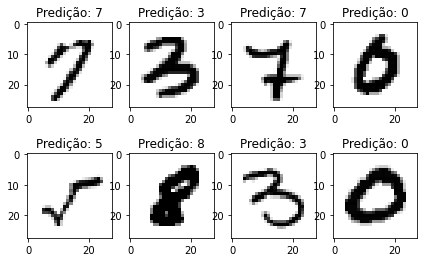

In [51]:
import numpy as np

predictions = model.predict_classes(train_images)
pyplot.figure(figsize=(7,14))

for i in range(0, 8):
    random_num = np.random.randint(0, len(train_images))
    img = train_images[random_num]
    pyplot.subplot(6,4,i+1)
    pyplot.margins(x = 20, y = 20)
    pyplot.title('Predição: ' + str(predictions[random_num]))
    pyplot.imshow(img.reshape(28, 28), cmap=pyplot.cm.binary)

pyplot.show()

Finalmente, para treinar nossa convnet utilizando placas gráficas (GPUs) para acelerar o processo de treinamento, acesse o menu `Edit > Notebook Settings`, e na caixa de seleção `Hardware Accelerator`, escolha `GPU`.